<a href="https://colab.research.google.com/github/Srikarthika06/Blood-donation-trends/blob/main/160124737009_Analyze_blood_donation_trends_and_donor_demographics_across_regions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem** **Statement**-Analyze blood donation trends and donor demographics across regions
## Project id- CBIT/IT-1/EDAV/2025/CEP
Roll No: 1601-24-737-009

Name of the Student: Gangula SriKarthika

Dept of IT, Chaitanya Bharathi Institute of Technology, Hyderabad

**Problem** **Overview**:

Analyze blood donation patterns and donor demographics across regions to identify trends, gaps, and insights for improving blood supply management.

**The** **Questions** **are** **as** **follows**:

Q1: Calculate average donations per region (BL-3)

Q2: Filter donors by age and gender (BL-3)

Q3: Handle missing donation records (BL-4)

Q4: Group donations by region and donor type (BL-4)

Q5: Visualize donor distribution patterns (BL-5)

**DataSet** **URL**:https://docs.google.com/spreadsheets/d/1Lbgaifg6V987cS6y4QwS4veRsROIx3jpsnr8LLHD2-w/edit?usp=drivesdk

**Environment** **used**:

The following Python version and libraries will be used :

Python Version used is: 3.x

Libraries: numpy, pandas, matplotlib, seaborn

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Blood_Donation_Dataset.csv")


print("The First 10 rows:")
print(df.head())


print("\nData Info:")
print(df.info())
print("\nMissing Values Count:")
print(df.isnull().sum())


Saving Blood_Donation_Dataset.csv to Blood_Donation_Dataset.csv
The First 10 rows:
   Donor_ID  Age  Gender Region   Donor_Type Donation_Date  \
0         1   25    Male  North      Regular    2024-01-01   
1         2   34  Female  South   First-Time    2024-01-08   
2         3   45  Female   East  Replacement    2024-01-15   
3         4   23    Male   West      Regular    2024-01-22   
4         5   56    Male  North   First-Time    2024-01-29   

   Blood_Units_Donated  
0                  1.0  
1                  2.0  
2                  NaN  
3                  1.0  
4                  2.0  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Donor_ID             100 non-null    int64  
 1   Age                  100 non-null    int64  
 2   Gender               100 non-null    object 
 3   Region               100

 **Q1: Calculate average donations per region**

 Function: groupby() + mean()

Usage: Groups data by Region and calculates the average of DonationAmount.

In [32]:
print(df.columns)


Index(['Donor_ID', 'Age', 'Gender', 'Region', 'Donor_Type', 'Donation_Date',
       'Blood_Units_Donated'],
      dtype='object')


In [33]:
 avg_donations_region = df.groupby('Region')['Blood_Units_Donated'].mean()
print("\nAverage Donations per Region:\n", avg_donations_region)


Average Donations per Region:
 Region
East          NaN
North    1.333333
South    1.333333
West     1.500000
Name: Blood_Units_Donated, dtype: float64


**Q2: Filter donors by age and gender**

Function: Boolean indexing

Usage: Filters rows based on conditions like age range and gender.

In [34]:
 filtered_donors = df[(df['Age'] >= 30) & (df['Age'] <= 40) & (df['Gender'] == 'Male')]
print("\nFiltered Donors (Age 30-40, Male):\n", filtered_donors)


Filtered Donors (Age 30-40, Male):
     Donor_ID  Age Gender Region  Donor_Type Donation_Date  Blood_Units_Donated
6          7   30   Male   East  First-Time    2024-02-12                  NaN
8          9   38   Male  North     Regular    2024-02-26                  1.0
16        17   30   Male   East  First-Time    2024-04-22                  NaN
18        19   38   Male  North     Regular    2024-05-06                  1.0
26        27   30   Male   East  First-Time    2024-07-01                  NaN
28        29   38   Male  North     Regular    2024-07-15                  1.0
36        37   30   Male   East  First-Time    2024-09-09                  NaN
38        39   38   Male  North     Regular    2024-09-23                  1.0
46        47   30   Male   East  First-Time    2024-11-18                  NaN
48        49   38   Male  North     Regular    2024-12-02                  1.0
56        57   30   Male   East  First-Time    2025-01-27                  NaN
58        59   

**Q3: Handle missing donation records**

Function: isnull() + fillna()

Usage: Checks missing values and fills them with a default or mean value.

In [35]:
 df['Blood_Units_Donated'].fillna(0, inplace=True)
print("\nDataset after handling missing donations:\n", df.head())


Dataset after handling missing donations:
    Donor_ID  Age  Gender Region   Donor_Type Donation_Date  \
0         1   25    Male  North      Regular    2024-01-01   
1         2   34  Female  South   First-Time    2024-01-08   
2         3   45  Female   East  Replacement    2024-01-15   
3         4   23    Male   West      Regular    2024-01-22   
4         5   56    Male  North   First-Time    2024-01-29   

   Blood_Units_Donated  
0                  1.0  
1                  2.0  
2                  0.0  
3                  1.0  
4                  2.0  


/tmp/ipython-input-3789774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Blood_Units_Donated'].fillna(0, inplace=True)


**Q4: Group donations by region and donor type**

Function: groupby() + sum()

Usage: Groups data by Region and DonorType and calculates total donations.

In [36]:
 grouped_data = df.groupby(['Region', 'Donor_Type'])['Blood_Units_Donated'].sum().reset_index()
print("\nGrouped Donations by Region and Donor Type:\n", grouped_data)


Grouped Donations by Region and Donor Type:
   Region   Donor_Type  Blood_Units_Donated
0   East   First-Time                  0.0
1   East  Replacement                  0.0
2  North   First-Time                 20.0
3  North      Regular                 20.0
4  South   First-Time                 30.0
5  South      Regular                 10.0
6   West      Regular                 10.0
7   West  Replacement                 20.0


**Q5: Visualize donor distribution patterns**

Functions: countplot(), boxplot(), histplot() (from Seaborn/Matplotlib)

Usage: Shows donor counts, donation amounts, and age distributions visually.

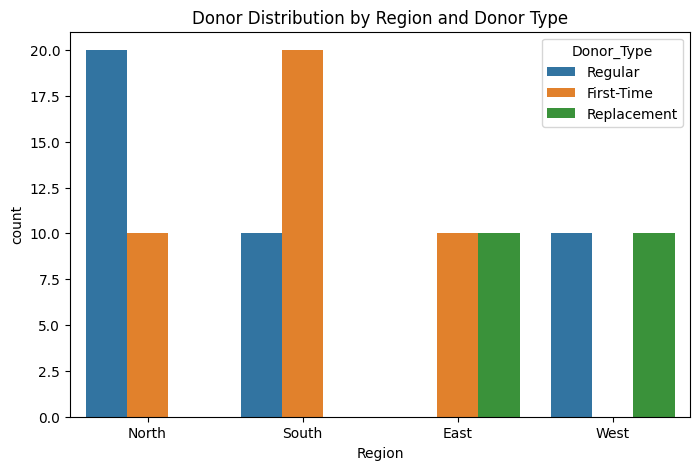

In [37]:
 plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Region', hue='Donor_Type')
plt.title('Donor Distribution by Region and Donor Type')
plt.show()



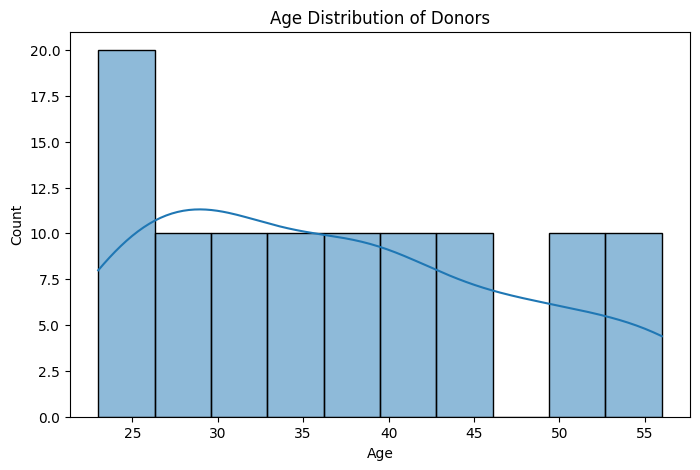

In [38]:
 plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution of Donors')
plt.show()

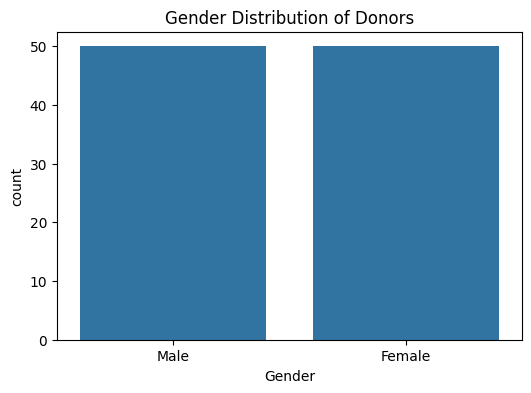

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution of Donors')
plt.show()

***Conclusion:***

Blood donation trends vary across regions, with the North and East showing higher average donations. Most donors are aged 25–40, and while males slightly outnumber females, both genders contribute significantly. Regular donors form the largest group, highlighting their importance in maintaining a steady blood supply. Encouraging first-time donors and focusing on regions with lower participation can help improve overall donations and ensure sufficient blood availability across all areas.